In [1]:
import matplotlib.pyplot as plt #melakukan import library matplotlib.pyplot sebagai plt
import pandas as pd #melakukan import library pandas sebagai pd
import numpy as np #melakukan import library numpy sebagai np
import cv2 as cv #melakukan import library cv2 sebagai cv
import math #mengimport library math agar dapat menggunakan fungsi-fungsi yang ada di dalammnya

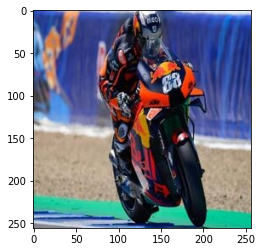

In [2]:
img1 = plt.imread("oliveira.jpg") #mengimport file oliveira.jpg kedalam variabel img1 menggunakan imread pada library plt
plt.imshow(img1) #menampilkan citra yang telah di import ke dalam variabel img1 menggunakan imshow pada library plt

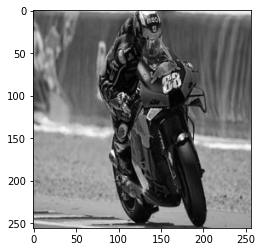

In [3]:
grayImg1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY) #mengonversi warna dari BGR(dalam format cv2) ke GRAY
plt.imshow(grayImg1, cmap='gray') #menampilkan hasil citra yang telah di konversi dalam gray scale

In [4]:
def hist(img, title): #membuat fungsi hist untuk menampilkan histogram dari gambar yang di ambil dari parameter fungsi, selain gambar fungsi juga mengambil parameter judul histogramnya
    sumGray = np.zeros(256) #membuat matriks 0 dengan menggunakan numpy.zeros dan ukurannya 256, matriks dimasukkan ke variabel sumGray
    #melakukan perulangan untuk menghitung jumlah pixel yang memiliki derajat keabuan i (mencari ni)
    for  i in range(len(img)): 
        for j in range(len(img[0])): 
            val = int (img[i,j]) 
            sumGray[val] += 1
    grayValue = [i for i in range(256)] #membuat array dari angka dari 0-255 dan menyimpannya di variabel grayValue
    plt.title(title) #membuat judul pada histogram dengan fungsi title dan mengambil satu parameter berupa string
    plt.bar(grayValue, sumGray, color='magenta') #membuat histogram dengan fungsi bar pada library plt
    

Histogram Image 1

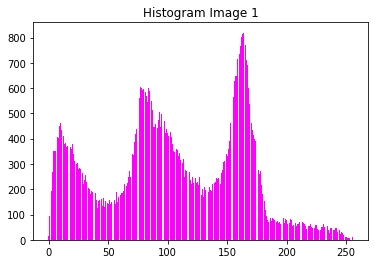

In [5]:
hist(grayImg1, "Histogram Image 1") #memanggil fungsi hist untuk membuat histogram dengan 2 argumen yang diberikan yaitu grayImg1 sebagai citranya dan "Histogram Image 1" sebagai judul dari histogramnya 

Ekualisasi Image 1

In [6]:
def ekualisasi(img, level): #membuat fungsi ekualisasi dengan img dan level sebagai parameternya
  hist = np.zeros(level).astype(int) #membuat matriks 0 dengan level diambi dari parameter 
  tinggi, lebar = img.shape #mengambil tinggi dan lebar denga fungsi shape dari img yang diambil dari parameter img

  #melakukan perulangan untuk menghitung jumlah pixel yang memiliki derajat keabuan i (mencari ni) 
  for i in range(tinggi ):
    for j in range(lebar):
      hist[img[i,j]] +=1

  #menghitung distribusi kumulatif dari nilai skala keabuan ke-i dari citra asli
  Ci = np.zeros(level).astype(int) #mendeklarasikan variabel Ci untuk menampung matriks 0 dengan ukuran level diambil dari parameter 
  for i in range(level): #melakukan perulangan untuk menelusuri seluruh nilai skala keabuan pada level 8 bit
    Ci[i] = np.sum( hist[0:i+1] ) #menghitung distribusi kumulatif dengan menjumlahkan frekuensi derajat keabuan ke 0 hingga derajat keabuan ke-i

  #menghitung target nilai keabuan hasil ekualisasi dengan menerapkan rumus ekualisasi 
  target_value = Ci*(level-1)/(tinggi*lebar)
  target_value = np.floor(target_value).astype(int) #membulatkan kebawah hasil perhitungan target nilai keabuan dengan fungsi np.floor

  #mendeklarasikan variabel res untuk menyimpan hasil ekualisasi pada citra res
  result = np.zeros(img.shape) #melakukan perulangan untuk menelusuri setiap pixel dalam citra res
  for i in range(tinggi):
    for j in range(lebar):
      #melakukan pemetaan target skala keabuan pada citra res
      result[i, j] = target_value[img[i,j]] #memanggil target (skala keabuan tujuan) dengan indeks img[i, j] (skala keabuan asli)
  
  return result #mengembalikan citra res sebagai hasil ekualisasi pada citra asli yang dimasukkan melalui parameter fungsi

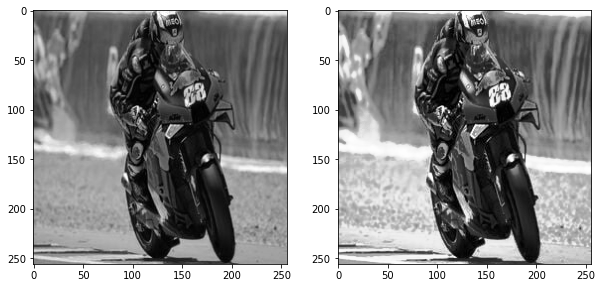

In [7]:
grayImg_equ = ekualisasi(grayImg1, 256) #memanggil fungsi ekualisasi untuk melakukan ekualisasi terhadap citra pada variabel grayImg1 dengan level 256
plt.figure(figsize = (10,10)) #mengatur perbesaran dari gambar yang akan ditampilkan dengan library plt
plt.subplot(1, 2, 1) #membuat subplot dengan 1 baris 2 kolom dan penempatan pada kolom 1
plt.imshow(grayImg1, cmap='gray') #menampilkan grayImg1 yaitu citra yang telah diubah ke  grayscale
plt.subplot(1, 2, 2) #membuat subplot dengan 1 baris 2 kolom dan penempatan pada kolom 2
plt.imshow(grayImg_equ, cmap='gray') #menampilkan grayImg_equ yaitu citra grayImg1 yang telah dilakukan ekalualisasi

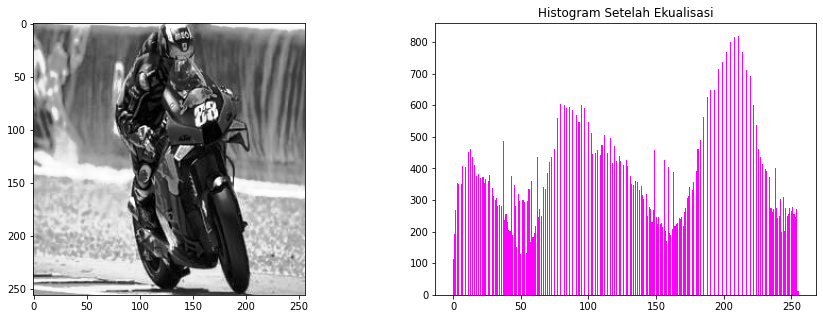

In [8]:
plt.figure(figsize=(15,5)) #mengatur perbesaran dari gambar yang akan ditampilkan dengan library plt
plt.subplot(1, 2, 1) #membuat subplot dengan 1 baris 2 kolom dan penempatan pada kolom 1
plt.imshow(grayImg_equ, cmap='gray') #menampilkan grayImg_equ yaitu citra grayImg1 yang telah dilakukan ekalualisasi
plt.subplot(1, 2, 2) #membuat subplot dengan 1 baris 2 kolom dan penempatan pada kolom 2
hist(grayImg_equ, "Histogram Setelah Ekualisasi") #membuat histogram dengan fungsi hist dan argumen citra pada grayImg_equ dan judul dari histogramnya

In [9]:
grayImg_equ

array([[131., 135., 141., ..., 254., 253., 253.],
       [128., 131., 138., ..., 253., 253., 253.],
       [121., 124., 132., ..., 253., 253., 253.],
       ...,
       [163., 162., 161., ..., 181., 183., 188.],
       [160., 159., 160., ..., 183., 185., 185.],
       [162., 160., 161., ..., 188., 188., 190.]])

Spesifikasi Histogram

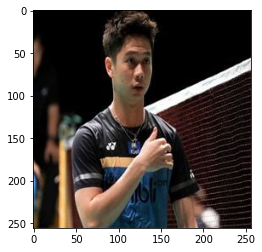

In [10]:
img2 = plt.imread("marc.jpg") #menimport citra marc.jpg dengan fungsi imread pada library plt dan menampungnya pada variabel img2
plt.imshow(img2) #menampilkan citra pada img2 dengan fungsi imshow pada plt

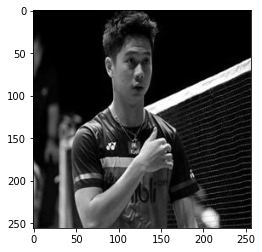

In [11]:
grayImg2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY) #mengonversi warna dari BGR(dalam format cv2) ke GRAY
plt.imshow(grayImg2, cmap='gray') #menampilkan hasil citra yang telah di konversi dalam gray scale

In [12]:
def find_target(img, level): #membuat fungsi untuk menetukan target nilai skala keabuan dari tiap pixel dalam citra asli
  hist = np.zeros(level).astype(int) #membuat matriks 0 dengan level diambi dari parameter 
  tinggi, lebar = img.shape #mengambil tinggi dan lebar denga fungsi shape dari img yang diambil dari parameter img

  #melakukan perulangan untuk menghitung jumlah pixel yang memiliki derajat keabuan i (mencari ni) 
  for i in range(tinggi ):
    for j in range(lebar):
      hist[img[i,j]] +=1

  #menghitung distribusi kumulatif dari nilai skala keabuan ke-i dari citra asli
  Ci = np.zeros(level).astype(int) #mendeklarasikan variabel Ci untuk menampung matriks 0 dengan ukuran level diambil dari parameter 
  for i in range(level): #melakukan perulangan untuk menelusuri seluruh nilai skala keabuan pada level 8 bit
    Ci[i] = np.sum( hist[0:i+1] ) #menghitung distribusi kumulatif dengan menjumlahkan frekuensi derajat keabuan ke 0 hingga derajat keabuan ke-i

  #menghitung target nilai keabuan hasil ekualisasi dengan menerapkan rumus ekualisasi 
  target_value = Ci*(level-1)/(tinggi*lebar)
  target_value = np.floor(target_value).astype(int) #membulatkan kebawah hasil perhitungan target nilai keabuan dengan fungsi np.floor

  
  return target_value #mengembalikan nilai target yang diperoleh

In [13]:
def compare_hist(img1, img2): #membuat fungsi compare_hist untuk menampilkan dan membandingkan histogram dari gambar 1 dan 2
  plt.figure(figsize=(15,5)) #mengatur perbesaran dari gambar yang akan ditampilkan dengan library plt
  plt.subplot(1, 2, 1) 
  hist(img1, "Image 1") #memanggil fungsi hist untuk menampilkan histogram dari citra 
  plt.subplot(1, 2, 2)#membuat subplot dengan 1 baris 2 kolom dan penempatan pada kolom 2
  hist(img2, "Image 2") #memanggil fungsi hist untuk menampilkan histogram dari citra

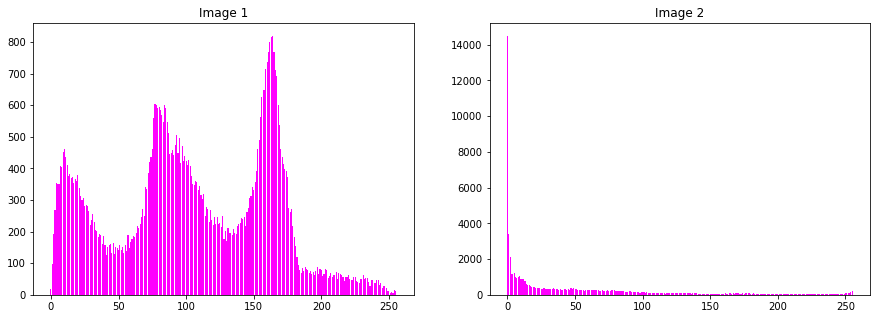

In [14]:
compare_hist(grayImg1, grayImg2) #memanggil fungsi compare_hist dengan argumen citra pada grayImg1 dan grayImg2

In [15]:
target1 = find_target(grayImg1, 256) #memanggil fungsi find_target dengan argumen citra pada grayImg1 dan 256 sebagai levelnya
target2 = find_target(grayImg2, 256) #memanggil fungsi find_target dengan argumen citra pada grayImg2 dan 256 sebagai levelnya

In [16]:
def findClosestColor(nilai, tujuan): #fungsi untuk mencari warna terdekat pada citra dengan mengambil 2 parameter yaitu nilai dan tujuan
  min = abs(nilai-tujuan[0]) #mendaklarasikan variabel min sebagai tempat menampung hasil dari nilai-tujuan[0] dan hasilnya absolut
  warna_min = 0 #variabel warna_min menampung nilai 0, nantinya sebagai tempat menampung indeks warna yang dicari
  for i in range(len(tujuan)): #melakukan perulangan untuk menelusri citra pada citra tujuan
    checking = abs(nilai-tujuan[i]) #variabel checking menampung hasil dari nilai-tujuan pada indeks ke i dan hasilnya absolut
    if(min > checking): #melakukan pengkondisian jika min lebih besar dari checking
      min = checking #maka nilai dari min akan diganti dengan nilai pada variabel checking
      warna_min = i #warna_min akan menampung indeks nilai pada i
  return warna_min #akan mengembalikan nilai warna_min yang diperoleh

map = np.zeros(256, dtype=int) #membuat variabel map dan akan menampung matriks 0 dgn ukuran 256
for i in range(256): #perulangan untuk memasukkan nilai pada fungsi findClosestColor pada setiap target ke dalam matriks pada variabel map
  map[i] = findClosestColor(target1[i], target2)
  

In [17]:
result = np.zeros(grayImg1.shape).astype(int) #membuat variabel result untuk menampung hasil dari spesifikasi 
for i in range(grayImg1.shape[0]): #perulangan i sebanyak tinggi pada citra
  for j in range(grayImg1.shape[1]): #di dalam perulangan i dilakukan perulangan j sebanyak lebar dari citra
    result[i, j] = map[grayImg1[i, j]] #mengisi nilai pada result [i,j] dengan variabel map berdasarkan grayImg1[i,j](citra pertama)

result

array([[ 18,  21,  25, ..., 254, 252, 252],
       [ 17,  18,  23, ..., 252, 252, 252],
       [ 13,  15,  19, ..., 252, 252, 252],
       ...,
       [ 42,  41,  41, ...,  58,  59,  64],
       [ 40,  39,  40, ...,  59,  61,  61],
       [ 41,  40,  41, ...,  64,  64,  66]])

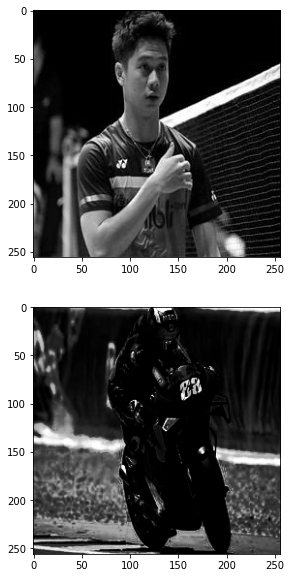

In [18]:
plt.figure(figsize=(15,10)) #mengatur perbesaran dari gambar yang akan ditampilkan dengan library plt
plt.subplot(2,1,1) #membuat subplot dengan 2 baris 1 kolom dan penempatan pada baris 1
plt.imshow(grayImg2, cmap='gray') #menampilkan hasil citra pada grayImg2
plt.subplot(2,1,2) #membuat subplot dengan 2 baris 1 kolom dan penempatan pada baris 2
plt.imshow(result, cmap='gray') #menampilkan hasil citra pada result (hasil dari spesifikasi citra grayImg1 berdasarkan citra grayImg2 )

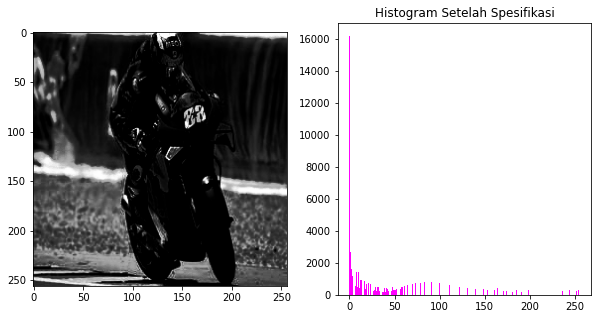

In [24]:
plt.figure(figsize=(10,5)) #mengatur perbesaran dari gambar yang akan ditampilkan dengan library plt
plt.subplot(1,2,1) #membuat subplot dengan 2 baris 1 kolom dan penempatan pada baris 1
plt.imshow(result, cmap='gray') #menampilkan hasil citra pada grayImg2
plt.subplot(1,2,2) #membuat subplot dengan 2 baris 1 kolom dan penempatan pada baris 2
histo_spec = hist(result, "Histogram Setelah Spesifikasi")

In [25]:
result

array([[ 18,  21,  25, ..., 254, 252, 252],
       [ 17,  18,  23, ..., 252, 252, 252],
       [ 13,  15,  19, ..., 252, 252, 252],
       ...,
       [ 42,  41,  41, ...,  58,  59,  64],
       [ 40,  39,  40, ...,  59,  61,  61],
       [ 41,  40,  41, ...,  64,  64,  66]])

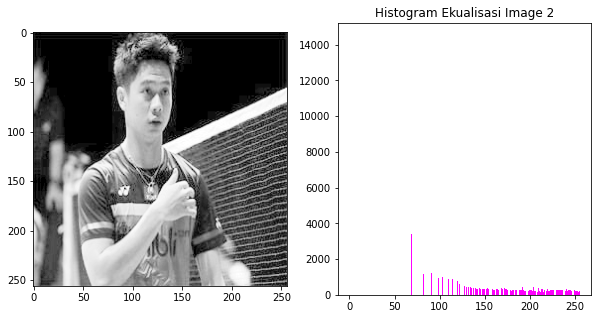

In [29]:
grayImg2_equ = ekualisasi(grayImg2, 256) 
plt.figure(figsize=(10,5)) #mengatur perbesaran dari gambar yang akan ditampilkan dengan library plt
plt.subplot(1,2,1)
plt.imshow(grayImg2_equ, cmap='gray')
plt.subplot(1,2,2)
hist(grayImg2_equ, "Histogram Ekualisasi Image 2")

In [30]:
grayImg2_equ

array([[120., 114., 107., ..., 107., 114., 120.],
       [ 91.,  82.,  69., ...,  69.,  82.,  91.],
       [ 86.,  77.,  56., ...,  56.,  77.,  86.],
       ...,
       [197., 193., 189., ...,  82.,  69.,  77.],
       [196., 192., 187., ...,  91.,  69.,  91.],
       [197., 194., 189., ..., 110.,  95.,  99.]])